# Regression Projects Using Various Dataset and Algorithm

# 1) Car Price Prediction Using Linear and Lasso Regression

# Importing the Dependencies

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and  Preprocessing

In [7]:
# Loading the data from csv to pandas Data Frame
car_data=pd.read_csv('car data.csv')

In [8]:
car_data.head()# First 5 rows of the data set

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
#Checking the number of Rows and columns
car_data.shape

(301, 9)

In [10]:
# Getting some information about this dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
#Checking the Number of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
#checking the distribution of the categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding the Categorical Data

In [14]:
# Encoding "Fuel_Type" column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding "Seller_Type" column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# Encoding "Transmission_Type" column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [15]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [16]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


# Splitting the data and Target

In [17]:
X=car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_data['Selling_Price']

In [18]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [19]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting Training and Testing

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

# Model Training

# 1.Linear Regression 

In [22]:
#Loading the linear regression model
lin_reg=LinearRegression()

In [23]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [24]:
#Prediction on training data
train_data_prediction = lin_reg.predict(X_train)

In [25]:
# R squared Error
error_score=metrics.r2_score(Y_train, train_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.87994516604937


# Visualize the Actual prices and Predicted Prices

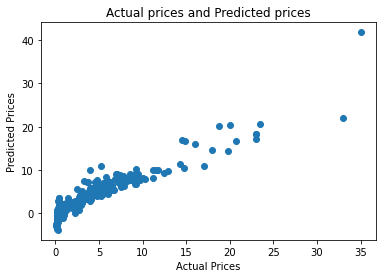

In [26]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices and Predicted prices")
plt.show()

# Test data

In [27]:
#Prediction on testing data
test_data_prediction = lin_reg.predict(X_test)

In [28]:
# R squared Error
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.8365766715024749


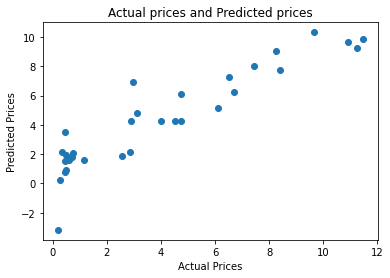

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices and Predicted prices")
plt.show()

# 2.Lasso Regression

In [30]:
#Loading the linear regression model
lasso_reg=Lasso()

In [31]:
lasso_reg.fit(X_train,Y_train)

Lasso()

# Model Evaluation

In [32]:
#Prediction on training data
train_data_prediction = lasso_reg.predict(X_train)

In [34]:
# R squared Error
error_score=metrics.r2_score(Y_train, train_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.8427856123435794


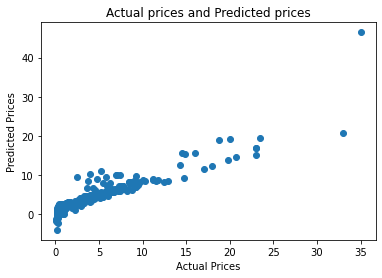

In [35]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices and Predicted prices")
plt.show()

# Test Data

In [36]:
#Prediction on testing data
test_data_prediction = lasso_reg.predict(X_test)

In [37]:
# R squared Error
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.8709167941173195


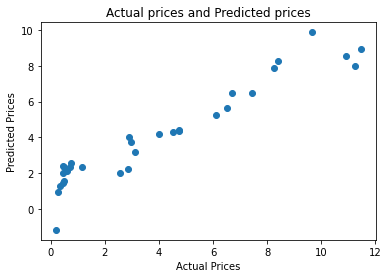

In [38]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices and Predicted prices")
plt.show()

# XGBoost Regression

In [43]:
from xgboost import XGBRegressor

In [45]:
xg_reg=XGBRegressor()

In [46]:
xg_reg.fit(X_train,Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [47]:
#Prediction on training data
train_data_prediction = xg_reg.predict(X_train)

In [48]:
error_score=metrics.r2_score(Y_train, train_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.999988239034454


# Test Data

In [49]:
#Prediction on testing data
test_data_prediction = xg_reg.predict(X_test)

In [50]:
# R squared Error
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error:",error_score)

R Squared Error: 0.9739216554116775


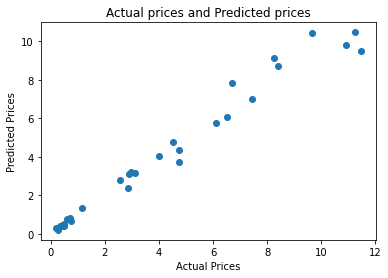

In [51]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices and Predicted prices")
plt.show()

# 2) House Price Prediction 

# Importing the Dependencies

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [57]:
house_data=sklearn.datasets.load_boston()
print(house_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [58]:
#Loading the dataset to a Pandas DataFrame

In [60]:
house=pd.DataFrame(house_data.data,columns = house_data.feature_names)

In [61]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [62]:
# Add the target column to the DataFrame

In [63]:
house['Price']=house_data.target

In [64]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [65]:
# Checking the number of Rows and Columns in the DataFrame

In [66]:
house.shape

(506, 14)

In [67]:
# Checking for missing values

In [68]:
house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [69]:
# Statistical Meatures of the dataset

In [70]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [71]:
# Understanding the correlation between various features in the dataset

In [74]:
correlation = house.corr()

In [75]:
# Constructing the Heatmap to understand the correlation

<AxesSubplot:>

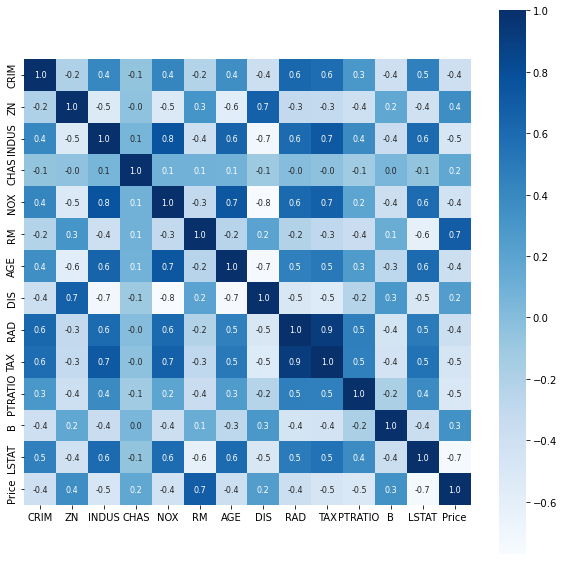

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

# Spliting the Data and Target

In [79]:
X = house.drop(['Price'], axis=1)
Y=house['Price']

In [80]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

# Spliting the data into Training data and Testing Data

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [82]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


# Model Training 

# XGBoost Regressor

In [84]:
# Loading the Model
model = XGBRegressor()

In [85]:
#Training the Model
model.fit(X_train, Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Evaluation

# Training data

In [86]:
# accuracy for prediction on training data
training_data=model.predict(X_train)

In [87]:
training_data

array([23.147501 , 20.99463  , 20.090284 , 34.69053  , 13.903663 ,
       13.510157 , 21.998634 , 15.1940975, 10.899711 , 22.709627 ,
       13.832816 ,  5.592794 , 29.810236 , 49.99096  , 34.89215  ,
       20.607384 , 23.351097 , 19.23555  , 32.695698 , 19.641418 ,
       26.991022 ,  8.401829 , 46.00729  , 21.708961 , 27.062933 ,
       19.321356 , 19.288303 , 24.809872 , 22.61626  , 31.70493  ,
       18.542515 ,  8.697379 , 17.395294 , 23.700663 , 13.304856 ,
       10.492197 , 12.688369 , 25.016556 , 19.67495  , 14.902088 ,
       24.193798 , 25.007143 , 14.900281 , 16.995798 , 15.6009035,
       12.699232 , 24.51537  , 14.999952 , 50.00104  , 17.525454 ,
       21.184624 , 31.998049 , 15.613355 , 22.89754  , 19.325378 ,
       18.717896 , 23.301125 , 37.222923 , 30.09486  , 33.102703 ,
       21.00072  , 49.999332 , 13.405827 ,  5.0280113, 16.492886 ,
        8.405072 , 28.64328  , 19.499939 , 20.586452 , 45.402164 ,
       39.79833  , 33.407326 , 19.83506  , 33.406372 , 25.2714

In [88]:
# R Square Error
score1= metrics.r2_score(Y_train, training_data)

# Mean Absolute Error
score2= metrics.mean_absolute_error(Y_train, training_data)

print("R squared Error:", score1)
print("Mean Absolute Error:", score2)

R squared Error: 0.9999948236320982
Mean Absolute Error: 0.0145848437110976


# Visualizing the Actual prices and Predicted prices

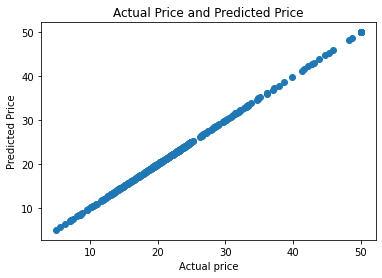

In [91]:
plt.scatter(Y_train,training_data)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual Price and Predicted Price")
plt.show()

# Testing Data

In [92]:
# accuracy for prediction on testing data
testing_data=model.predict(X_test)

In [93]:
# R Square Error
score1= metrics.r2_score(Y_test, testing_data)

# Mean Absolute Error
score2= metrics.mean_absolute_error(Y_test, testing_data)

print("R squared Error:", score1)
print("Mean Absolute Error:", score2)

R squared Error: 0.8711660369151691
Mean Absolute Error: 2.2834744154238233


# 3) Gold Price Prediction Using Random forest Regressor

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing 

In [96]:
#Loading the csv data to pandas DataFrame 
gold_data=pd.read_csv('gld_price_data.csv')

In [97]:
gold_data.head() # First 5 Rows

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [99]:
gold_data.tail() # Last 5 Rows


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [100]:
# Number of Rows and columns in the data

In [101]:
gold_data.shape

(2290, 6)

In [102]:
# Getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [103]:
# Checking the Number missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [104]:
# Getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [105]:
correlation = gold_data.corr()

<AxesSubplot:>

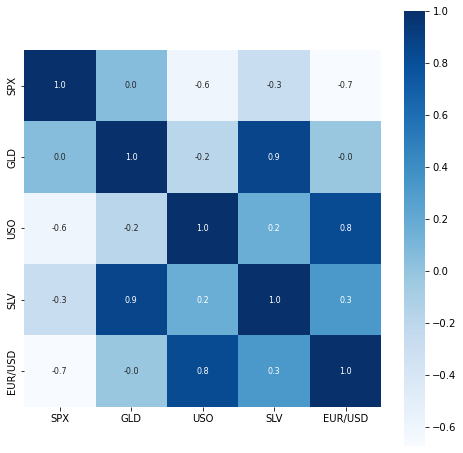

In [106]:
# constructing the heatmap to  understand the correlation 
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [107]:
# Correlation values of GOLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

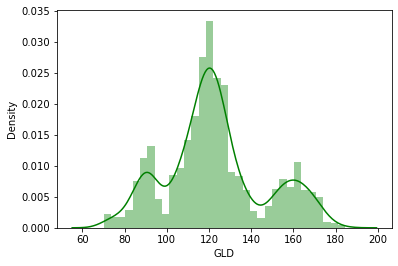

In [108]:
# Checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

# Splitting the Features and Target

In [109]:
X = gold_data.drop(['Date', 'GLD'],axis=1)
Y = gold_data['GLD']

In [110]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [111]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting the Training data and testing data

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [113]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


# Model Training

# Random Forest Regressor

In [114]:
model= RandomForestRegressor(n_estimators=100)

In [115]:
#Training the Model
model.fit(X_train, Y_train)

RandomForestRegressor()

# Model Evaluation

In [116]:
#Prediction on test data
test_data=model.predict(X_test)

In [117]:
test_data

array([168.66279882,  81.76449993, 115.94540032, 127.72950089,
       120.94940085, 154.62779735, 150.36769792, 126.11570053,
       117.32169901, 125.9419009 , 116.39840124, 171.87390013,
       141.83569842, 167.66649797, 115.19500024, 117.81310062,
       139.92710232, 170.25990075, 158.35420195, 161.13829978,
       155.17289987, 125.28160015, 176.48859935, 156.88820378,
       125.25430052,  93.68189992,  77.59649986, 120.46870034,
       119.11099958, 167.6336    ,  88.09050064, 125.27179989,
        91.22010079, 117.76020029, 121.13059909, 135.76840003,
       115.64470122, 115.19030052, 147.65250047, 107.34370074,
       104.79490262,  87.24779797, 126.44150098, 117.75199991,
       152.72189916, 119.66680001, 108.41000002, 108.10759798,
        93.28550034, 127.21749747,  74.7350002 , 113.72649931,
       121.38579999, 111.30669912, 118.84779863, 120.5680994 ,
       159.54939965, 167.81300203, 146.98279723,  85.91669871,
        94.51470022,  86.90059905,  90.83560025, 118.95

In [118]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data) 
print("R Square Error:", error_score)

R Square Error: 0.9893814410133682


# Compare the Actual and Predicted calues in a plot


In [119]:
Y_test=list(Y_test) 


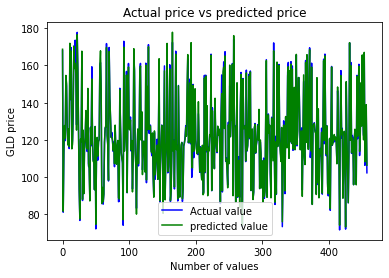

In [120]:
plt.plot(Y_test, color='blue', label='Actual value')
plt.plot(test_data, color='green', label='predicted value')
plt.title("Actual price vs predicted price")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()

# 4) Medical Insurance Cost Prediction 

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection and Processing

In [122]:
#loading the csv file to pandas DataFrame
insurance_data=pd.read_csv('insurance.csv')

In [123]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [125]:
insurance_data.shape #Number of rows and columns

(1338, 7)

In [126]:
insurance_data.info() # Getting some information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [128]:
insurance_data.isnull().sum() # Checking the missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [130]:
insurance_data.describe() # Statiscal Measures of the Dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


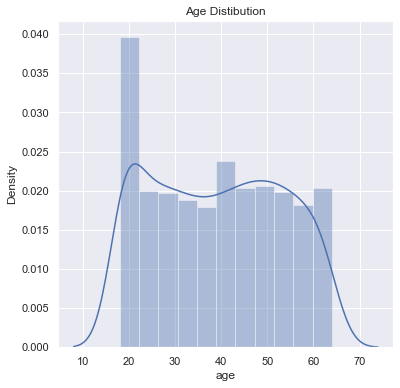

In [131]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distibution')
plt.show()

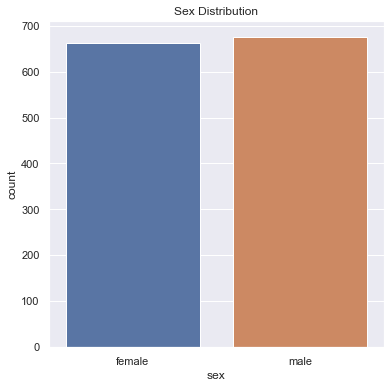

In [133]:
# Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [135]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


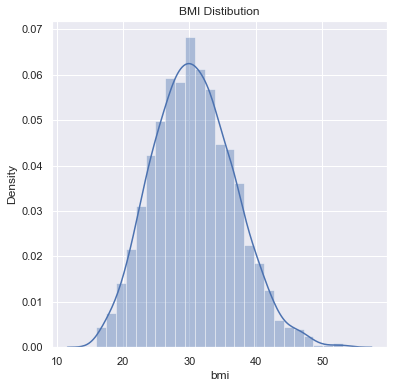

In [136]:
#BMI Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distibution')
plt.show()

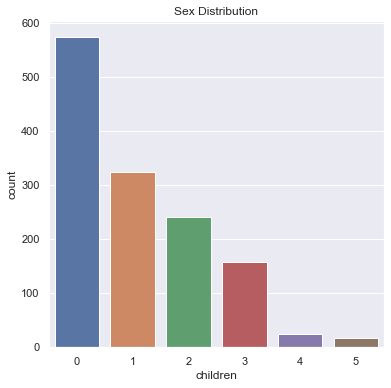

In [137]:
#Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [138]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

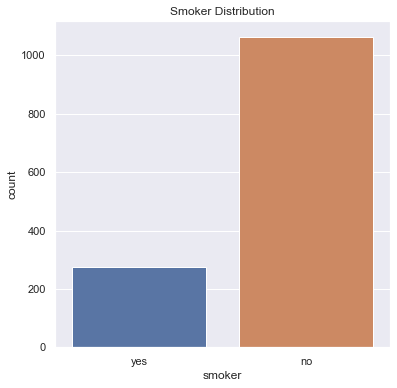

In [139]:
#smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoker Distribution')
plt.show()

In [140]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

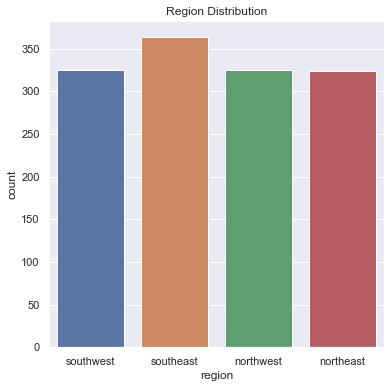

In [141]:
#Region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('Region Distribution')
plt.show()

In [142]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


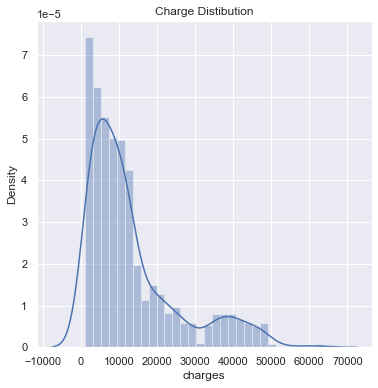

In [143]:
#Charges Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charge Distibution')
plt.show()

# Data Preprocessing:

# Encoding the categorical Features

In [145]:
#Encoding the 'sex' column
insurance_data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#encoding the 'Smoker' column
insurance_data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding the 'Region' column
insurance_data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)


In [146]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# Splitting the Features and Target

In [147]:
X = insurance_data.drop(columns='charges',axis=1)
Y = insurance_data['charges']

In [148]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [149]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into Training data and Testing data

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [151]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

# Linear Regression

In [167]:
#Loading the LinearRegression
model= LinearRegression()

In [168]:
#Fitting the training data
model.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation

In [169]:
#Prediction of training data
training_data = model.predict(X_train)

In [170]:
# R squared value
r2_train=metrics.r2_score(Y_train, training_data)

In [171]:
print("R Square Value:",r2_train)

R Square Value: 0.751505643411174


# Testing data

In [172]:
#Prediction of Testing data
testing_data = model.predict(X_test)

In [173]:
# R squared value
r2_test=metrics.r2_score(Y_test, testing_data)

In [174]:
print("R Square Value:",r2_test)

R Square Value: 0.7447273869684077


# Building a Predictive System

In [191]:
input_data=(30,0,35.3,0,0,1)

#Changing input data to numpy array

input_data_numpy_array=np.asarray(input_data)

#reshape the array
input_data_reshape=input_data_numpy_array.reshape(1,-1)


In [192]:
prediction = model.predict(input_data_reshape)
print(prediction)

[30783.86174497]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [193]:
print('Insurance Cost is USD:',prediction[0])

Insurance Cost is USD: 30783.86174496701


# 5) Big Mart Sales Prediction

# Importing the Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Data Collection and Analysis

In [152]:
big_mart=pd.read_csv('Big Mart sales.csv')

In [153]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [154]:
big_mart.shape


(8523, 12)

In [155]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [156]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling Missing Values

In [157]:
#Mean Value of Item_Weight column
big_mart['Item_Weight'].mean()

12.857645184136183

In [158]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(), inplace=True)

In [159]:
# mode of "Outlet_Size" column
big_mart['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [160]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [161]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [162]:
miss_values = big_mart['Outlet_Size'].isnull()   

In [163]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [164]:
big_mart.loc[miss_values, 'Outlet_Size'] = big_mart.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [165]:
# checking for missing values
big_mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [166]:
big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Numerical Features:

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


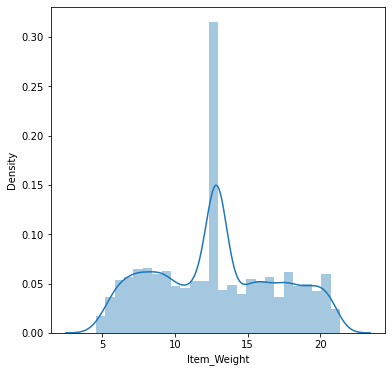

In [167]:
# Item Weight Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_Weight'])
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


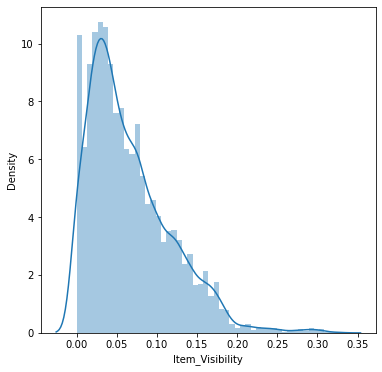

In [168]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_Visibility'])
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


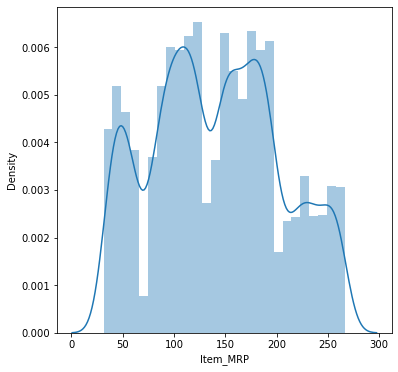

In [169]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_MRP'])
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


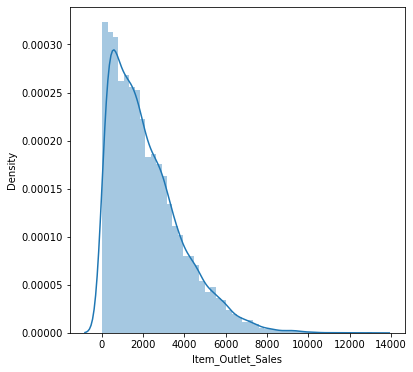

In [170]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_Outlet_Sales'])
plt.show()

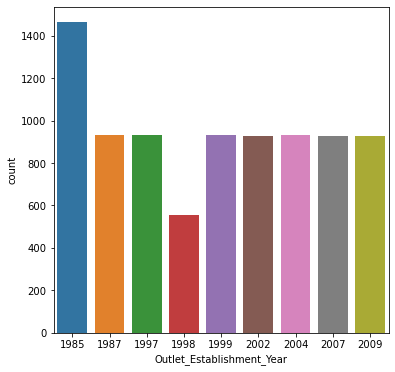

In [171]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart)
plt.show()

# Categorical column

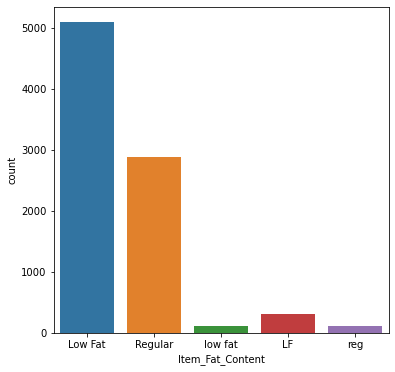

In [172]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart)
plt.show()

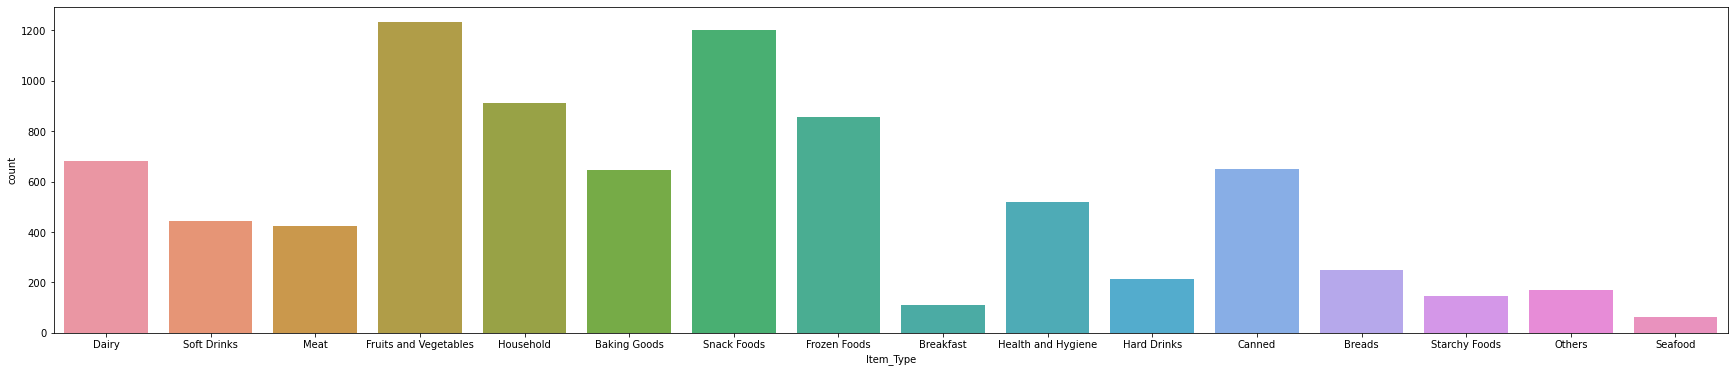

In [173]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart)
plt.show()

# Data Preprocessing

In [174]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [175]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [176]:
big_mart.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [177]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Label Encoding

In [178]:
encoder= LabelEncoder()

In [179]:
big_mart['Item_Identifier'] =encoder.fit_transform(big_mart['Item_Identifier'])


In [180]:
big_mart['Item_Fat_Content'] =encoder.fit_transform(big_mart['Item_Fat_Content'])


In [181]:
big_mart['Item_Type'] =encoder.fit_transform(big_mart['Item_Type'])


In [182]:
big_mart['Outlet_Identifier'] =encoder.fit_transform(big_mart['Outlet_Identifier'])

In [183]:

big_mart['Outlet_Location_Type'] =encoder.fit_transform(big_mart['Outlet_Location_Type'])

big_mart['Outlet_Type'] =encoder.fit_transform(big_mart['Outlet_Type'])

In [184]:
big_mart['Outlet_Size'] = encoder.fit_transform(big_mart['Outlet_Size'])

In [186]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting features and Target

In [187]:
X = big_mart.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart['Item_Outlet_Sales']

In [188]:
print(X)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]


In [189]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# Splitting the data into Training data & Testing Data

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [191]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Machine Learning Model Training

# XGBoost Regressor

In [192]:
regressor = XGBRegressor()

In [193]:
regressor.fit(X_train, Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Evaluation

In [194]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [195]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [196]:
print('R Squared value = ', r2_train)

R Squared value =  0.8639680373364909


In [197]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [198]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [200]:
print('R Squared value = ', r2_test)

R Squared value =  0.5233136709735687


# 6) Calories Burnt Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
cal=pd.read_csv('calories.csv')

In [3]:
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exer=pd.read_csv('exercise.csv')

In [5]:
exer.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
#Combining the two data sets


In [6]:
cal_data=pd.concat([exer,cal['Calories']],axis=1)

In [7]:
cal_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
cal_data.shape

(15000, 9)

In [9]:
cal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
cal_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# Data Analysis

In [11]:
cal_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Visualization

In [12]:
sns.set()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

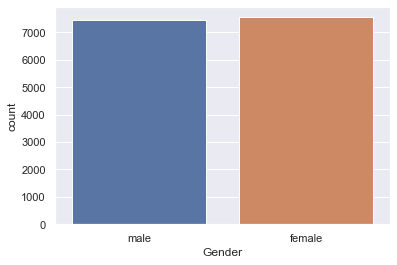

In [13]:
sns.countplot(cal_data['Gender'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

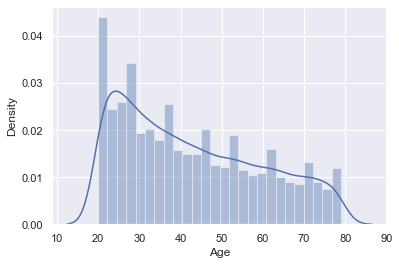

In [14]:
#Finding the distribution of 'Age' column
sns.distplot(cal_data['Age'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

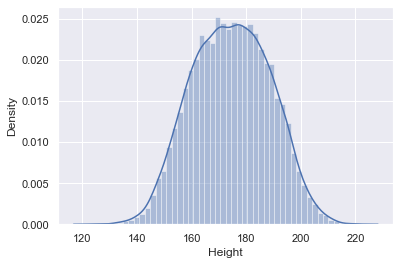

In [15]:
#Finding the distribution of 'Height' column
sns.distplot(cal_data['Height'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

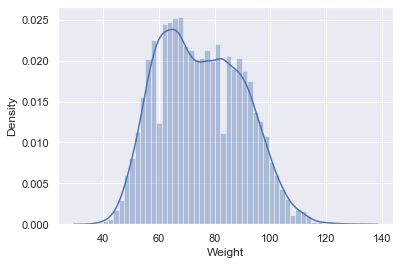

In [16]:
#Finding the distribution of 'Weight' column
sns.distplot(cal_data['Weight'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

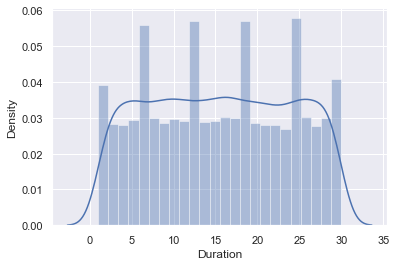

In [17]:
#Finding the distribution of 'Duration' column
sns.distplot(cal_data['Duration'])

# Finding the Correlation in the data

In [18]:
correlation = cal_data.corr()

<AxesSubplot:>

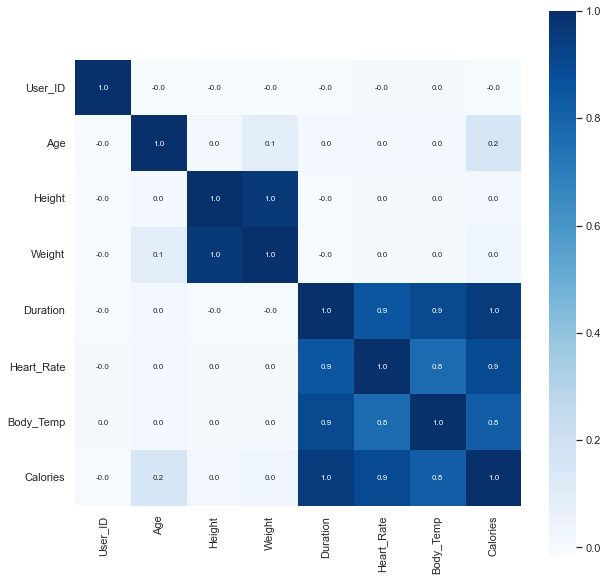

In [19]:
# Constructing the Heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues' )

# Converting the text data to numeric values:

In [20]:
cal_data.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [21]:
cal_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [23]:
X = cal_data.drop(columns=['User_ID', 'Calories'],axis=1)
Y = cal_data['Calories']

In [24]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [25]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# Model Training

In [28]:
model= XGBRegressor()

In [29]:
model.fit(X_train, Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Evaluation

In [30]:
test_predict=model.predict(X_test)

In [31]:
print(test_predict)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


# Mean Absolute Error:

In [32]:
mae = metrics.mean_absolute_error(Y_test, test_predict)

In [34]:
print("Mean Absolute Error:",mae)

Mean Absolute Error: 1.4807048829992613
